In [1]:
import scipy.io as scio
import pandas as pd
data_path = "D:\works\sklearn\sklearn_book\数据集\mnist-original.mat"

In [2]:
data = scio.loadmat(data_path)

In [3]:
x, y = data['data'].T, data['label'].T

In [4]:
%matplotlib inline

In [5]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[36000]
some_digit_image = some_digit.reshape(28, 28) 

### 画一下这个图看看

In [6]:
# plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
# plt.axis('off') # 隐藏坐标系
# plt.show()

In [7]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [8]:
import numpy as np
shuffle_index = np.random.permutation(60000) # permutation就是有返回值的shuffle，随机打乱
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## 不靠谱的交叉验证

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
# SGD是随机梯度下降
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=666)
sgd_clf.fit(x_train, y_train_5)

E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=666, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
# sgd_clf.predict([some_digit])

In [12]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

In [13]:
# from sklearn.base import BaseEstimator
# class Never5Classifier(BaseEstimator):
#     def fit(self, x, y=None):
#         pass
#     def predict(self, x):
#         return np.zeros((len(x), 1), dtype=bool)

In [14]:
# never_5_clf = Never5Classifier()
# cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring='accuracy')

## 混淆矩阵

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53485,  1094],
       [ 1537,  3884]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

0.7164729754657813

In [18]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7469949033560921

In [19]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([48167.67273898])

In [20]:
# threshold = 200000
# y_some_digit_pred = (y_scores > threshold)
# y_some_digit_pred

In [21]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method='decision_function')

E:\conda\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\con

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

### 召回率与准确率曲线

In [23]:
# precisions[:-1]

In [24]:
plt.figure(figsize=(20, 8), dpi=40)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
#     plt.plot([70000, 70000], [0, 1])
    plt.xlabel('Threshold', fontsize=20, color='g')
    plt.xticks(color='g', fontsize=20)
    plt.yticks(color='g', fontsize=20)
    plt.legend(loc='upper left')
    plt.ylim([0, 1])
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.show()

<Figure size 800x320 with 0 Axes>

In [25]:
# sgd_clf.decision_function([x[36000]])

In [26]:
# plt.plot(recalls, precisions)
# plt.show()

In [27]:
# y_train_pred_90 = (y_scores > 70000)

In [28]:
# y_train_pred_90

In [29]:
# precision_score(y_train_5, y_train_pred_90)

NameError: name 'y_train_pred_90' is not defined

### ROC曲线

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [31]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99508969, 0.99508969,
       1.        ])

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
# plot_roc_curve(fpr, tpr)
# plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9531531356693773

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=666)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method='predict_proba')

E:\conda\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [36]:
y_probas_forest.shape

(60000, 2)

In [37]:
# plt.plot(fpr, tpr, 'b:', label='SGD')
# plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
# plt.legend(loc='bottom right')
# plt.show()

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.9932640351658735

In [39]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.])

In [40]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-159496.24309179, -450663.6124262 , -296153.72182312,
        -128298.01839505, -353097.19888759,   48167.67273898,
        -715350.49690436, -352872.06160593, -551962.86694381,
        -433942.37056673]])

In [41]:
np.argmax(some_digit_scores)

5

In [42]:
forest_clf.fit(x_train, y_train)
forest_clf.predict_proba([some_digit])

E:\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\conda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\

array([0.86707658, 0.83739187, 0.8240236 ])

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')

E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\

array([0.90891822, 0.91044552, 0.90903636])

In [45]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)

E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\conda\

In [46]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5734,    2,   30,    6,   13,   43,   42,    8,   41,    4],
       [   1, 6480,   47,   29,    6,   33,    8,   12,  115,   11],
       [  55,   38, 5328,  102,   80,   22,   95,   57,  168,   13],
       [  50,   37,  139, 5328,    2,  232,   36,   57,  149,  101],
       [  22,   24,   33,    9, 5330,    7,   55,   32,   89,  241],
       [  60,   39,   37,  174,   70, 4607,  112,   37,  191,   94],
       [  35,   20,   48,    2,   33,   94, 5632,    7,   46,    1],
       [  22,   17,   69,   26,   56,   11,    6, 5815,   14,  229],
       [  50,  158,   77,  146,   13,  149,   54,   26, 5037,  141],
       [  41,   32,   27,   83,  156,   32,    2,  212,   87, 5277]],
      dtype=int64)

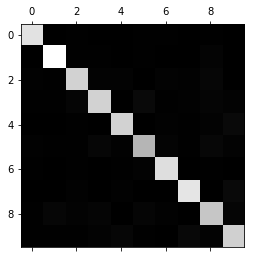

In [49]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [63]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

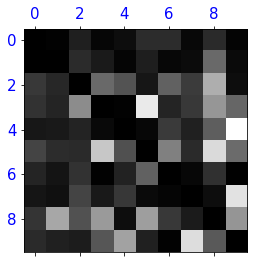

In [77]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xticks(color='b', fontsize=15)
plt.yticks(color='b', fontsize=15)
plt.show()

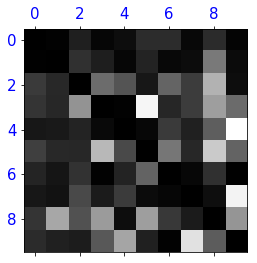

In [76]:
np.fill_diagonal(conf_mx, 0)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xticks(color='b', fontsize=15)
plt.yticks(color='b', fontsize=15)
plt.show()

In [83]:
x_train[1].shape

(784,)